In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('D:\ML\data\iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
pd.unique(df['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
len(pd.unique(df['species']))

3

In [8]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [51]:
X=df.iloc[:,:-1]
#y=df.iloc[:,-1]
y=df[['species']]

In [52]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
classifier=LogisticRegression()

In [58]:
classifier.fit(X_train,y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [73]:
classifier.predict([[5.1,3.5,1.4,0.2]])

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
accuracy= accuracy_score(y_test,y_pred)

In [63]:
accuracy

1.0

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [65]:
c_m=confusion_matrix(y_test,y_pred)

In [66]:
c_m

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted Values')

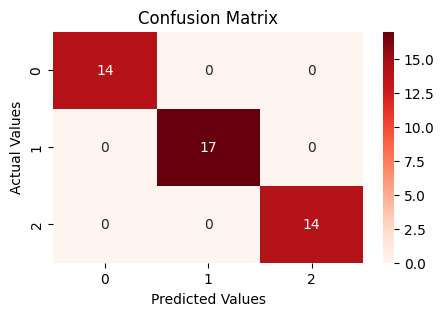

In [68]:
plt.figure(figsize=(5,3))
plt.title('Confusion Matrix')
sns.heatmap(c_m,annot=True,fmt='d',cmap='Reds')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')